<a href="https://colab.research.google.com/github/MoffatKirui/ipweek8/blob/main/IP_Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question


Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.





### b) Defining the Metric for Success

Our metric of success will be :

1.   Build at least 2 out of the 3 advanced decision trees models i.e Random forests, Ada boosted trees, and gradient boosted trees.
Try to optimize them and select the best one to determine which features are most impactful in influencing the prediction
2.   Apply Polynomial, linear and rbf kernel function to build SVM models and then evaluate their performance and pick the kernel that performs the best. 






### c) Understanding the context 

Dataset Columns:

* Age
* Sex
* on_thyroxine - taking the thyroxine drug
* query_on_thyroxine
* on_antithyroid_medicationthyroid_surgery
* query_hypothyroid
* query_hyperthyroid
* pregnant
* sick
* tumor
* lithium
* goitre
* TSH_measured
* TSH (thyroid stimulating hormone)
* T3_measured
* T3 (triiodothyronine)
* TT4_measured
* TT4 (thyroxine)

### d) Recording the Experimental Design

For the project to be a success, the following steps will be followed:

* Read and explore the given dataset.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform exploratory data analysis recording your observations.
* build a model that makes the above prediction using at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
* Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
* Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
* clean the data a little bit so as to make sense of the features.
* Document what transformation you've done on the data.
* Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 





### e) Data Relevance

The dataset has relevant predictor variables that relates to hypothyroidism hence can be used to classify whether a person has the condition or not.

## 2. Reading the Data

In [4]:
# Loading the Dataset
# Dataset url = "http://bit.ly/hypothyroid_data"

#importing necessary libraries for reading data
import pandas as pd
import numpy as np

#reading the data from url
url = "http://bit.ly/hypothyroid_data"
hypothyroid_data=pd.read_csv(url)

## 3. Checking the Data

In [5]:
# Determining the no. of records in our dataset
#
hypothyroid_data.shape

(3163, 26)

In [6]:
# Previewing the top of our dataset
#
hypothyroid_data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [7]:
# Previewing the bottom of our dataset
# 
hypothyroid_data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [8]:
# checking data types
hypothyroid_data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

# 4. External Data Source Validation

The dataset can be found in the following kaggle [link](https://www.kaggle.com/shivachandel/kc-Thyroid-data). 

# 5. Tidying the Dataset

In [9]:
# replacing the question marks with null values
#
hypothyroid_data.replace('?',np.nan,inplace=True)

In [10]:
hypothyroid_data['sex'].unique()

array(['M', 'F', nan], dtype=object)

In [11]:
# replacing values in sex with numerals
hypothyroid_data['sex'].replace('M',0,inplace=True)
hypothyroid_data['sex'].replace('F',1,inplace=True)

In [12]:
# encoding categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
hypothyroid_data['status']=labelencoder.fit_transform(hypothyroid_data['status'])
hypothyroid_data['on_thyroxine']=labelencoder.fit_transform(hypothyroid_data['on_thyroxine'])
hypothyroid_data['query_on_thyroxine']=labelencoder.fit_transform(hypothyroid_data['query_on_thyroxine'])
hypothyroid_data['on_antithyroid_medication']=labelencoder.fit_transform(hypothyroid_data['on_antithyroid_medication'])
hypothyroid_data['thyroid_surgery']=labelencoder.fit_transform(hypothyroid_data['thyroid_surgery'])
hypothyroid_data['query_hypothyroid']=labelencoder.fit_transform(hypothyroid_data['query_hypothyroid'])
hypothyroid_data['query_hyperthyroid']=labelencoder.fit_transform(hypothyroid_data['query_hyperthyroid'])
hypothyroid_data['pregnant']=labelencoder.fit_transform(hypothyroid_data['pregnant'])
hypothyroid_data['sick']=labelencoder.fit_transform(hypothyroid_data['sick'])
hypothyroid_data['tumor']=labelencoder.fit_transform(hypothyroid_data['tumor'])
hypothyroid_data['lithium']=labelencoder.fit_transform(hypothyroid_data['lithium'])
hypothyroid_data['goitre']=labelencoder.fit_transform(hypothyroid_data['goitre'])
hypothyroid_data['TSH_measured']=labelencoder.fit_transform(hypothyroid_data['TSH_measured'])
hypothyroid_data['T3_measured']=labelencoder.fit_transform(hypothyroid_data['T3_measured'])
hypothyroid_data['TT4_measured']=labelencoder.fit_transform(hypothyroid_data['TT4_measured'])   
hypothyroid_data['T4U_measured']=labelencoder.fit_transform(hypothyroid_data['T4U_measured']) 
hypothyroid_data['FTI_measured']=labelencoder.fit_transform(hypothyroid_data['FTI_measured']) 

In [13]:
hypothyroid_data[['age','TSH',	'T3',	'TT4','T4U','FTI']]=hypothyroid_data[['age','TSH',	'T3',	'TT4','T4U','FTI']].astype(float)

In [14]:
# Identifying missing data
hypothyroid_data.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [15]:
#dealing with missing values
hypothyroid_data['age'].fillna(hypothyroid_data['age'].mean(),inplace=True)
hypothyroid_data['TSH'].fillna(hypothyroid_data['TSH'].median(),inplace=True)
hypothyroid_data['T3'].fillna(hypothyroid_data['T3'].median(),inplace=True)
hypothyroid_data['TT4'].fillna(hypothyroid_data['TT4'].median(),inplace=True)
hypothyroid_data['T4U'].fillna(hypothyroid_data['T4U'].median(),inplace=True)
hypothyroid_data['FTI'].fillna(hypothyroid_data['FTI'].median(),inplace=True)
hypothyroid_data['sex'].fillna(hypothyroid_data['sex'].median(),inplace=True)

In [16]:
hypothyroid_data.isnull().sum()

status                          0
age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                             0
T3_measured                     0
T3                              0
TT4_measured                    0
TT4                             0
T4U_measured                    0
T4U                             0
FTI_measured                    0
FTI                             0
TBG_measured                    0
TBG                          2903
dtype: int64

In [17]:
# dropping the TBG data as most of it is missing
hypothyroid_data.drop(labels=['TBG','TBG_measured'],axis=1,inplace=True)

In [18]:
hypothyroid_data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [19]:
#checking for duplicates
hypothyroid_data.duplicated().sum()

156

In [20]:
# dealing duplicates
hypothyroid_data.drop_duplicates(inplace=True)

In [21]:
#confirming that each column has the right datatype
hypothyroid_data.dtypes

status                         int64
age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


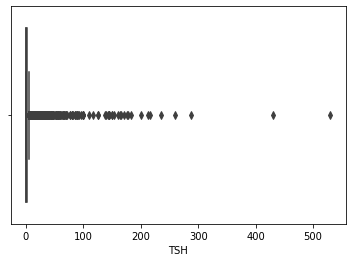

In [22]:
# checking for outliers
import seaborn as sb

sb.boxplot(hypothyroid_data['TSH'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


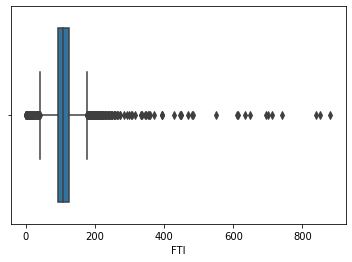

In [23]:
sb.boxplot(hypothyroid_data['FTI'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


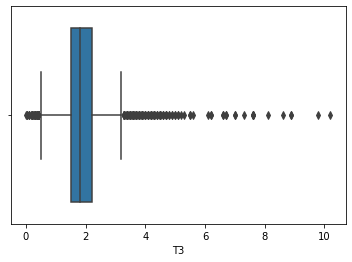

In [24]:
sb.boxplot(hypothyroid_data['T3'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


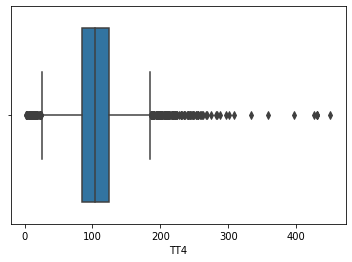

In [25]:
sb.boxplot(hypothyroid_data['TT4'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


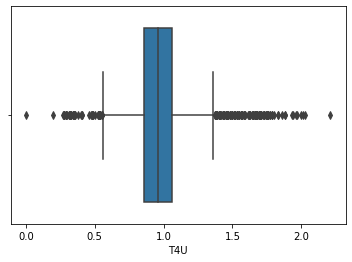

In [26]:
sb.boxplot(hypothyroid_data['T4U'])

## 6. Exploratory Analysis

In [27]:
# getting description of the data
hypothyroid_data.describe()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
count,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000
mean,0.953109,51.350030,0.704357,0.148321,0.018291,0.013967,0.034253,0.078151,0.075491,0.020286,0.032258,0.013302,0.000665,0.031593,0.874958,5.170442,0.800133,1.906950,0.946458,108.454905,0.946791,0.976625,0.947123,115.040206
std,0.211440,17.864731,0.456407,0.355477,0.134023,0.117375,0.181910,0.268454,0.264225,0.141000,0.176714,0.114585,0.025786,0.174943,0.330821,22.534054,0.399967,0.877747,0.225149,43.408647,0.224488,0.219740,0.223824,58.566137
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.500000,1.000000,85.000000,1.000000,0.860000,1.000000,92.000000
50%,1.000000,51.154214,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.700000,1.000000,1.800000,1.000000,104.000000,1.000000,0.960000,1.000000,107.000000
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.800000,1.000000,2.200000,1.000000,125.000000,1.000000,1.060000,1.000000,126.000000
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000


In [28]:
#mode
hypothyroid_data.mode()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,1,51.154214,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,1.8,1,104.0,1,0.96,1,107.0


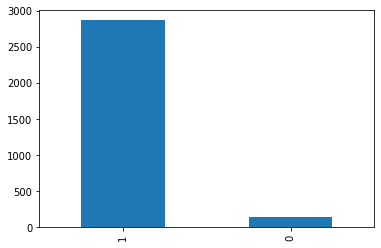

In [29]:
hypothyroid_data['status'].value_counts().plot(kind='bar')

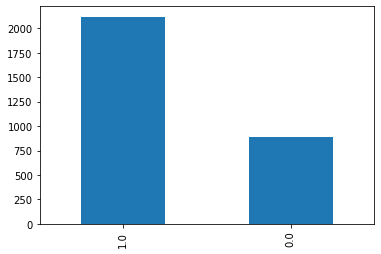

In [30]:
hypothyroid_data['sex'].value_counts().plot(kind='bar')

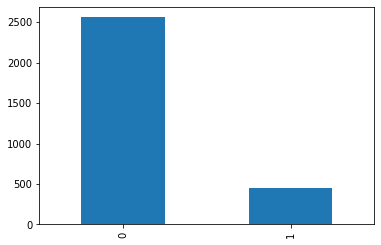

In [31]:
hypothyroid_data['on_thyroxine'].value_counts().plot(kind='bar')

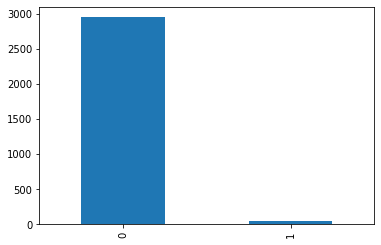

In [32]:
hypothyroid_data['query_on_thyroxine'].value_counts().plot(kind='bar')

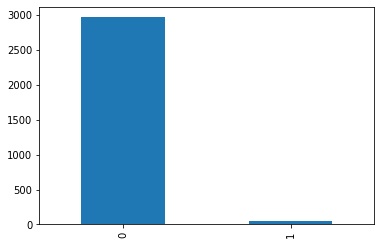

In [33]:
hypothyroid_data['on_antithyroid_medication'].value_counts().plot(kind='bar')

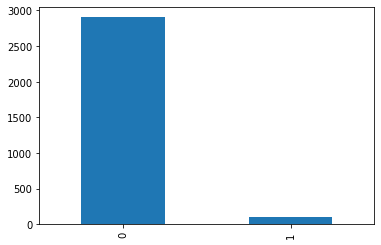

In [34]:
hypothyroid_data['thyroid_surgery'].value_counts().plot(kind='bar')

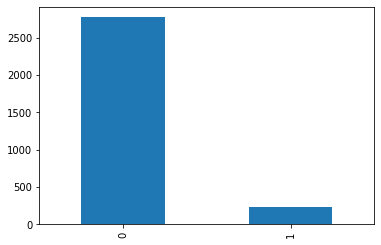

In [35]:
hypothyroid_data['query_hypothyroid'].value_counts().plot(kind='bar')

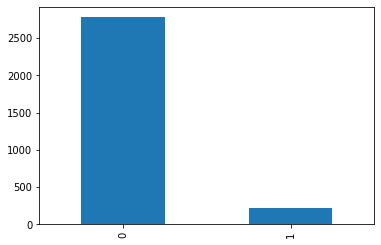

In [36]:
hypothyroid_data['query_hyperthyroid'].value_counts().plot(kind='bar')

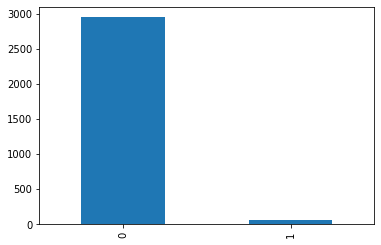

In [37]:
hypothyroid_data['pregnant'].value_counts().plot(kind='bar')

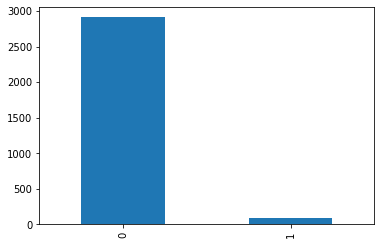

In [38]:
hypothyroid_data['sick'].value_counts().plot(kind='bar')

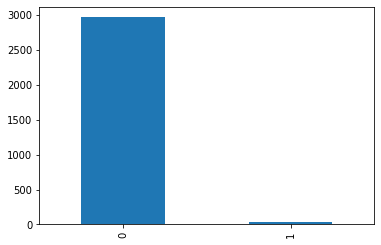

In [39]:
hypothyroid_data['tumor'].value_counts().plot(kind='bar')

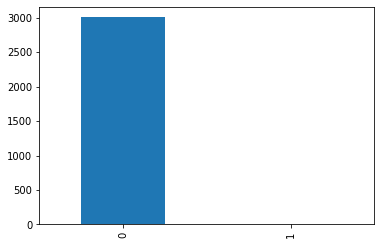

In [40]:
hypothyroid_data['lithium'].value_counts().plot(kind='bar')

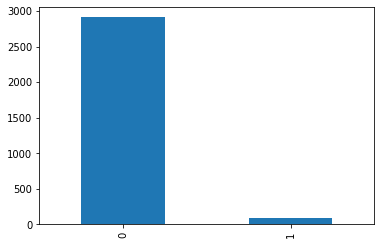

In [41]:
hypothyroid_data['goitre'].value_counts().plot(kind='bar')

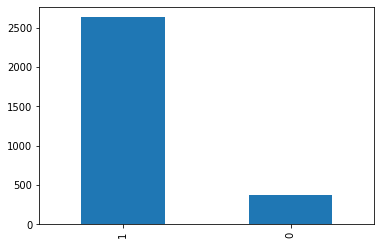

In [42]:
hypothyroid_data['TSH_measured'].value_counts().plot(kind='bar')

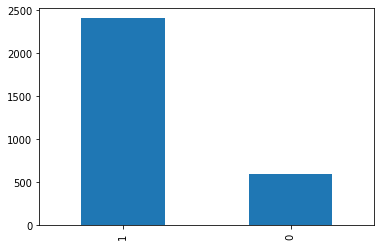

In [43]:
hypothyroid_data['T3_measured'].value_counts().plot(kind='bar')

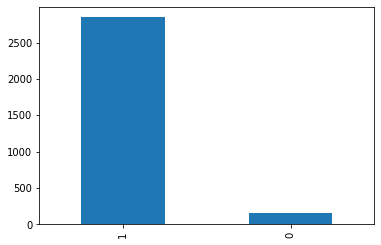

In [44]:
hypothyroid_data['TT4_measured'].value_counts().plot(kind='bar')

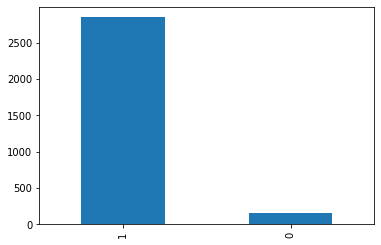

In [45]:
hypothyroid_data['T4U_measured'].value_counts().plot(kind='bar')

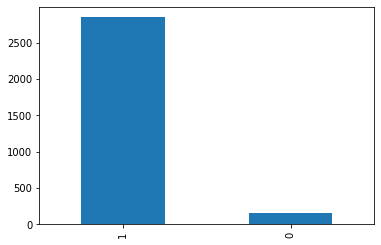

In [46]:
hypothyroid_data['FTI_measured'].value_counts().plot(kind='bar')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


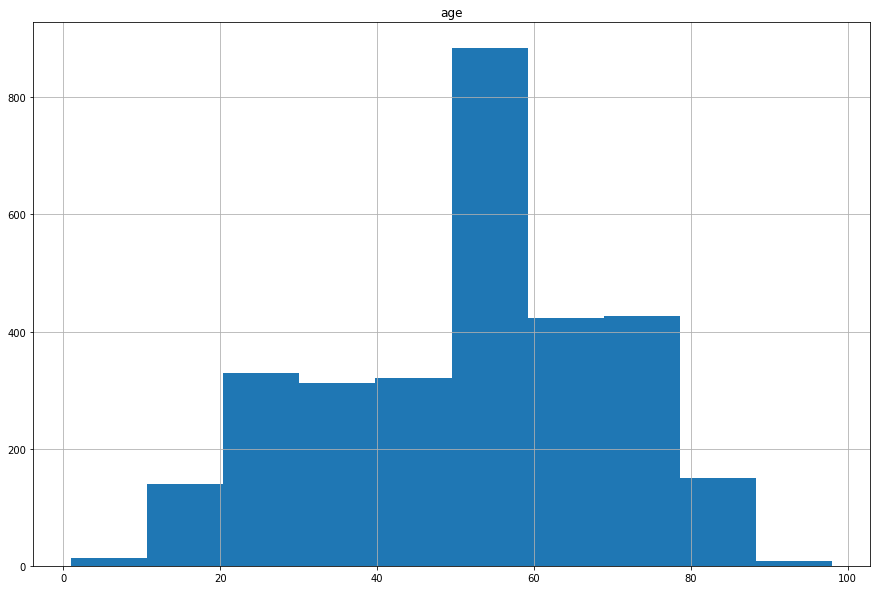

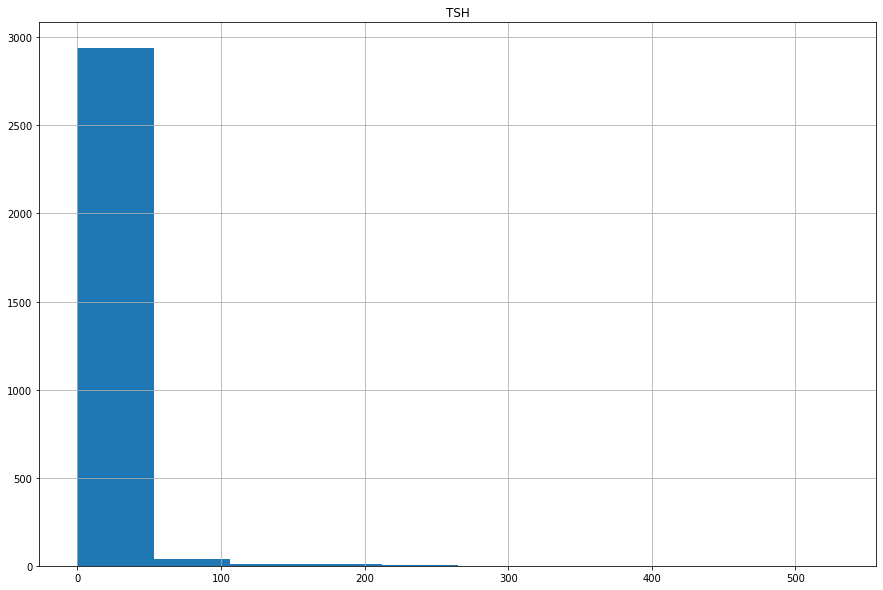

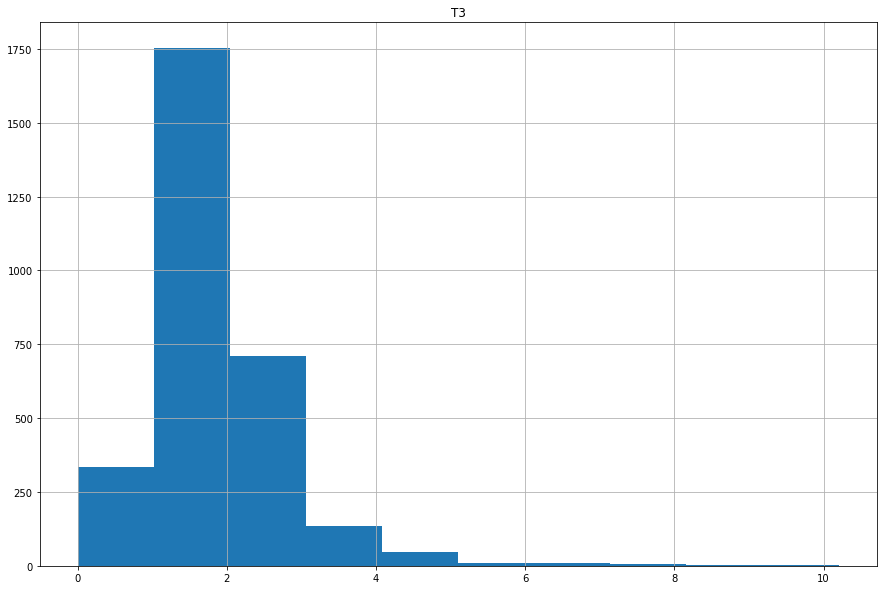

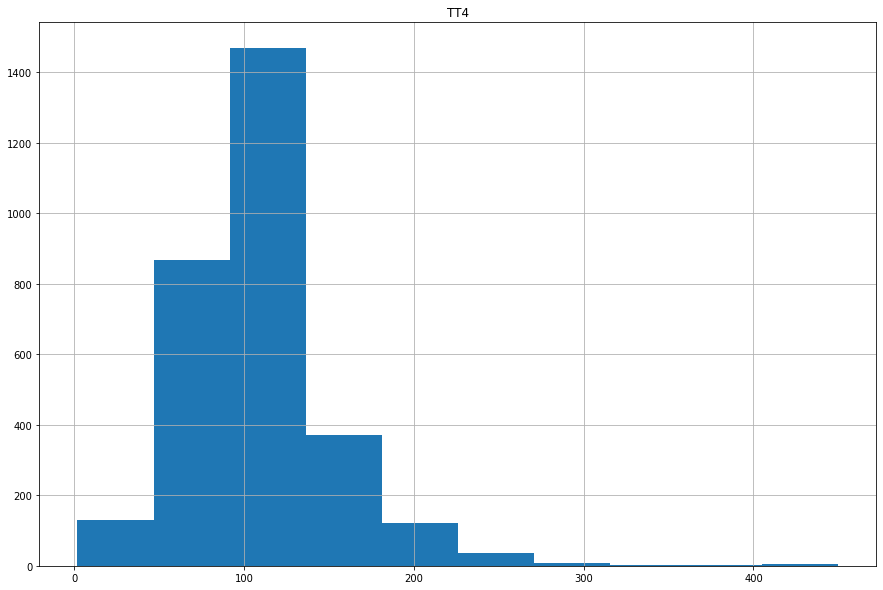

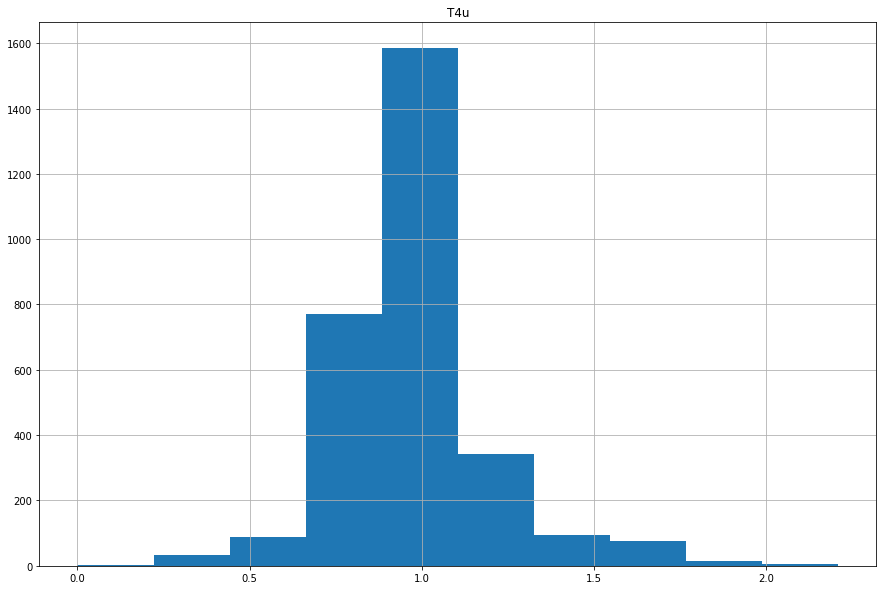

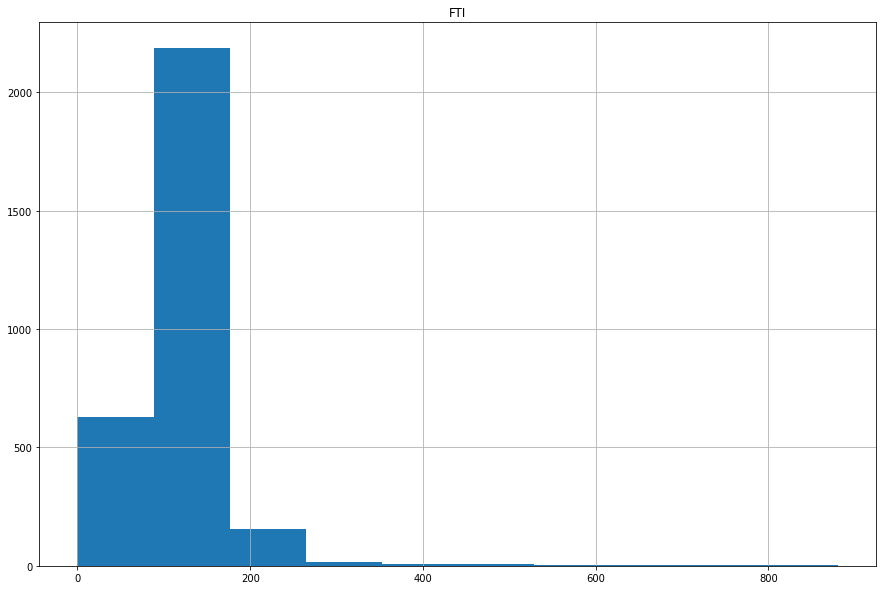

In [47]:
# plotting histograms
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
plt.title('age')
print(hypothyroid_data['age'].hist())
plt.figure(figsize=(15,10))
plt.title('TSH')
print(hypothyroid_data['TSH'].hist())
plt.figure(figsize=(15,10))
plt.title('T3')
print(hypothyroid_data['T3'].hist())
plt.figure(figsize=(15,10))
plt.title('TT4')
print(hypothyroid_data['TT4'].hist())
plt.figure(figsize=(15,10))
plt.title('T4u')
print(hypothyroid_data['T4U'].hist())
plt.figure(figsize=(15,10))
plt.title('FTI')
print(hypothyroid_data['FTI'].hist())

In [48]:
#checking correlation
correlations=hypothyroid_data.corr()
correlations

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
status,1.000000,-0.027474,-0.016153,0.039450,0.030276,0.012994,-0.044718,-0.046773,0.021699,0.020758,0.022689,0.025754,0.005722,0.004088,-0.079094,-0.590906,-0.059718,0.181543,-0.052755,0.374793,-0.052582,-0.086106,-0.052408,0.309848
age,-0.027474,1.000000,-0.002559,-0.005034,-0.021795,-0.061838,-0.015037,0.039948,-0.088436,-0.161615,0.061513,-0.066068,-0.022171,-0.039419,0.188714,0.006727,0.162288,-0.258683,0.100271,-0.084932,0.097385,-0.189463,0.098060,0.021243
sex,-0.016153,-0.002559,1.000000,0.124784,-0.052969,0.021219,0.045884,0.066456,0.058236,0.093226,-0.021954,0.005253,0.016714,0.092020,-0.002560,0.034802,-0.077782,0.069238,-0.053735,0.168997,-0.052934,0.198555,-0.055384,0.073693
on_thyroxine,0.039450,-0.005034,0.124784,1.000000,-0.015066,-0.025749,0.029442,0.063253,-0.087372,-0.000316,-0.065599,-0.023953,-0.010766,-0.027231,0.047435,-0.001696,-0.191533,0.011621,0.024439,0.218291,0.023892,0.071785,0.027524,0.114436
query_on_thyroxine,0.030276,-0.021795,-0.052969,-0.015066,1.000000,-0.016246,0.015229,-0.021251,-0.039004,-0.019641,-0.024921,0.049138,-0.003521,0.003723,-0.128473,-0.024275,-0.099341,-0.021159,0.032465,-0.019500,0.032359,-0.034163,0.032252,-0.003611
on_antithyroid_medication,0.012994,-0.061838,0.021219,-0.025749,-0.016246,1.000000,-0.006834,-0.034654,0.126889,0.002975,-0.021730,-0.013819,-0.003070,-0.021497,-0.040680,-0.004094,-0.025550,0.063960,-0.072398,-0.004512,-0.072788,0.025174,-0.073180,-0.020165
thyroid_surgery,-0.044718,-0.015037,0.045884,0.029442,0.015229,-0.006834,1.000000,-0.000338,0.022317,-0.014130,-0.034384,-0.021867,-0.004859,-0.023563,0.026972,0.014161,-0.001892,-0.007117,-0.012063,-0.016424,-0.012378,0.025863,-0.012695,-0.026515
query_hypothyroid,-0.046773,0.039948,0.066456,0.063253,-0.021251,-0.034654,-0.000338,1.000000,-0.017542,-0.015531,-0.053159,-0.033807,0.040546,-0.024256,0.035154,0.069431,-0.040374,-0.041413,0.014213,-0.010617,0.013823,0.044682,0.013432,-0.045861
query_hyperthyroid,0.021699,-0.088436,0.058236,-0.087372,-0.039004,0.126889,0.022317,-0.017542,1.000000,0.074962,-0.052171,-0.033179,-0.007372,0.041946,-0.143157,-0.033974,-0.033462,0.169864,-0.105387,0.130723,-0.106121,0.069307,-0.106860,0.060868
pregnant,0.020758,-0.161615,0.093226,-0.000316,-0.019641,0.002975,-0.014130,-0.015531,0.074962,1.000000,-0.026272,0.003883,-0.003712,0.081900,-0.002656,-0.012583,0.024727,0.203145,-0.018170,0.170787,-0.018437,0.323032,-0.018705,-0.006021


there is no significant multicolinearity in the data

## 7. Implementing the Solution

## Part 1: Decision trees:

1. Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = hypothyroid_data['status'].values


test_features = hypothyroid_data.columns.to_list()
test_features.remove('status')

X = hypothyroid_data[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

#defining the model and fitting data
forest = RandomForestRegressor(n_estimators = 300, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

In [50]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.014075818755442083
Mean Squared Error: 0.00712531960482387
Root Mean Squared Error: 0.08441160823502813


In [51]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)
forest = RandomForestRegressor()
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 28.3min finished


In [52]:
#viewing best parameters
bestF.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [53]:
y_pred = bestF.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013843265532698466
Mean Squared Error: 0.007579620398133836
Root Mean Squared Error: 0.08706101537504508


after using grid search to cross validate the random forest model, the result was approximately the same as just using random forest on its own proving that the model had performed optimally in the first phase.

2. Ada Boosted trees

In [54]:
from sklearn.ensemble import AdaBoostClassifier
# ada boost needs a simple decision tree so we import the model
from sklearn.tree import DecisionTreeClassifier
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                          n_estimators=300, random_state=1)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)
comparison_frame1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_ada.flatten()})

comparison_frame1.describe()

,Actual,Predicted
count,602.000000,602.000000
mean,0.958472,0.956811
std,0.199674,0.203452
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [55]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))

Mean Absolute Error: 0.008305647840531562
Mean Squared Error: 0.008305647840531562
Root Mean Squared Error: 0.09113532707206115


In [56]:
from sklearn.model_selection import RandomizedSearchCV
# creating a dictionary with the hyperparameters to be tuned 
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
 }
#defining the randomized search model 
rsv= RandomizedSearchCV(ada_boost,
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)
rsv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=5,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                            

In [57]:
#viewing best parameters
rsv.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [58]:
y_pred_ada=rsv.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))

Mean Absolute Error: 0.008305647840531562
Mean Squared Error: 0.008305647840531562
Root Mean Squared Error: 0.09113532707206115


the cross-validated model seemed to have improved significantly though not to the extent of outperforming the random forest one.

3. Gradient boosted model

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=5)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

In [60]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

Mean Absolute Error: 0.009966777408637873
Mean Squared Error: 0.009966777408637873
Root Mean Squared Error: 0.09983374884595826


In [61]:
#cross validating the model
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [62]:
y_pred_gbr=cv.predict(X_test)
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

Mean Absolute Error: 0.008305647840531562
Mean Squared Error: 0.008305647840531562
Root Mean Squared Error: 0.09113532707206115


From the above experiment , we found that random forest was the better model as it had the least error, so we choose it to determine which features are most impactful in influencing the prediction

In [63]:
# Get numerical feature importances
importances = list(forest.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

NotFittedError: ignored

## Part 2: SVM:

In [65]:
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(hypothyroid_data)
features=hypothyroid_data[['FTI','TSH']].values
label=hypothyroid_data['status'].values
F_train,F_test,l_train,l_test=train_test_split(features,label,test_size=0.3,random_state=2)

# 1. linear kernel
# Fit the model
model = SVC(kernel= 'linear')
model.fit(F_train,l_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


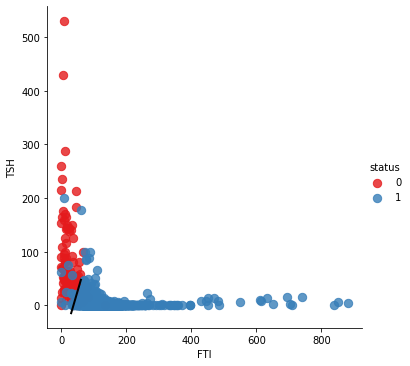

In [66]:
# Get the separating hyperplane
w = model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the butter vlaues and the smallest number of the butter values.  
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
sb.lmplot('FTI', 'TSH', data=hypothyroid_data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');


In [67]:
l_pred=model.predict(F_test)
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(l_test, l_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(l_test, l_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(l_test, l_pred)))

Mean Absolute Error: 0.016611295681063124
Mean Squared Error: 0.016611295681063124
Root Mean Squared Error: 0.12888481555661677


In [68]:
# 2. polynomial kernel

# Fit the model
model = SVC(kernel= 'poly')
model.fit(F_train,l_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [69]:
l_pred=model.predict(F_test)
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(l_test, l_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(l_test, l_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(l_test, l_pred)))

Mean Absolute Error: 0.024363233665559248
Mean Squared Error: 0.024363233665559248
Root Mean Squared Error: 0.15608726298311226


In [70]:
# 2. polynomial kernel
# Fit the model
model = SVC(kernel= 'rbf')
model.fit(F_train,l_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
l_pred=model.predict(F_test)
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(l_test, l_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(l_test, l_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(l_test, l_pred)))

Mean Absolute Error: 0.017718715393133997
Mean Squared Error: 0.017718715393133997
Root Mean Squared Error: 0.13311166512794437


linear kernel has performed better compared to the other kernels, so we proceed to tune its hyperparameters

In [72]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(F_train,l_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.979, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.976, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.988, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.979, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.981, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.979, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.979, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.981, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.979, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.976, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.988, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.979, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.981, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  9.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [73]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


applying the rest of the features to the chosen model

In [76]:

grid = SVC(kernel= 'linear',C=0.1,gamma=1)
grid.fit(X_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
y_pred=grid.predict(X_test)
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.019933554817275746
Mean Squared Error: 0.019933554817275746
Root Mean Squared Error: 0.1411862416005035


## 8. Challenging the solution


* Our model's performance could be improved by increasing the number of observations used to train and test it.
* we could also increase the number of iterations to get a better average performance.






## conclusion
* the best model to predict hypothyroidism given our set of data is random forest.
* the most important feature variable is FTI followed by TSH.
*cross-validating an advanced decision tree model is computationally expensive without much improvement in the performance